In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv=['C:/Users/Mikey.Windows/Documents/GitHub/Project-3/Data/final_tmdb_data_2000.csv.gz',
     'C:/Users/Mikey.Windows/Documents/GitHub/Project-3/Data/final_tmdb_data_2001.csv.gz']

In [3]:
#Create a list to concatenate
df_list = []
for file in csv:
    df = pd.read_csv(file, compression='gzip')
    df_list.append(df)

In [4]:
df_concatenated = pd.concat(df_list)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)
df_concatenated.to_csv('Data/tmdb_results_combined.csv.gz', compression='gzip', index=False)

In [5]:
df=df_concatenated

In [6]:
df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


# Filters

In [7]:
# Filtering the data frame for budget and revenue.
df_filtered = df[(df['budget'] > 0) | (df['revenue'] > 0)]
# Filter for Movies with financial significance
movies_w_fin=len(df_filtered)
# Average of revenue by certification
avg_rev_c=df_filtered.groupby('certification')['revenue'].mean()
# Average of budget by certification
avg_budget_c=df_filtered.groupby('certification')['budget'].mean()

# 1.Number of Movies with Valid Financial Information

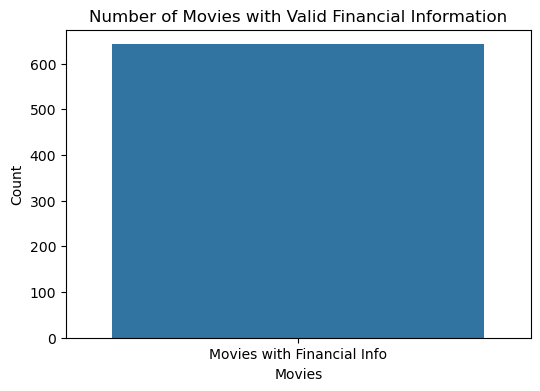

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Movies with Financial Info"], y=[movies_w_fin])
plt.title("Number of Movies with Valid Financial Information")
plt.xlabel("Movies")
plt.ylabel("Count")
plt.show()

# 2 Number of Movies by Certification Category

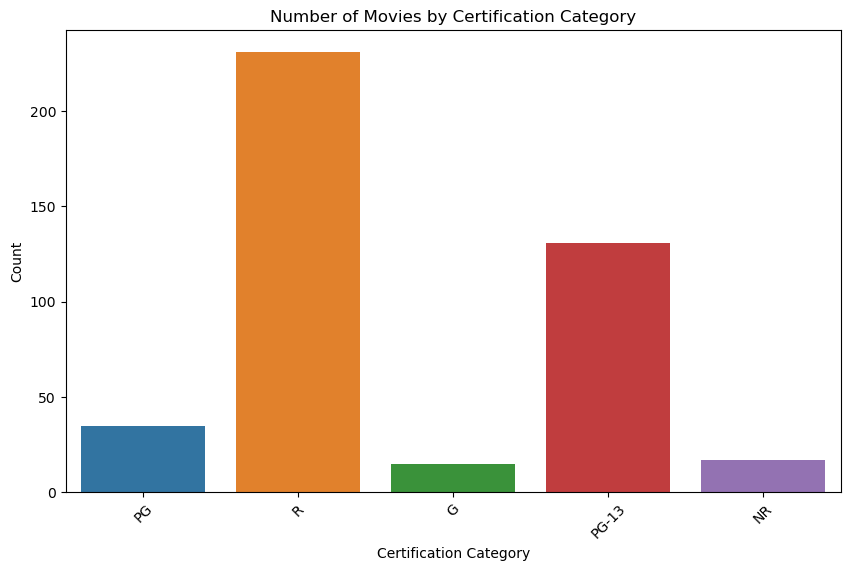

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='certification', data=df_filtered)
plt.title("Number of Movies by Certification Category")
plt.xlabel("Certification Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 3 Average Revenue per Certification Category

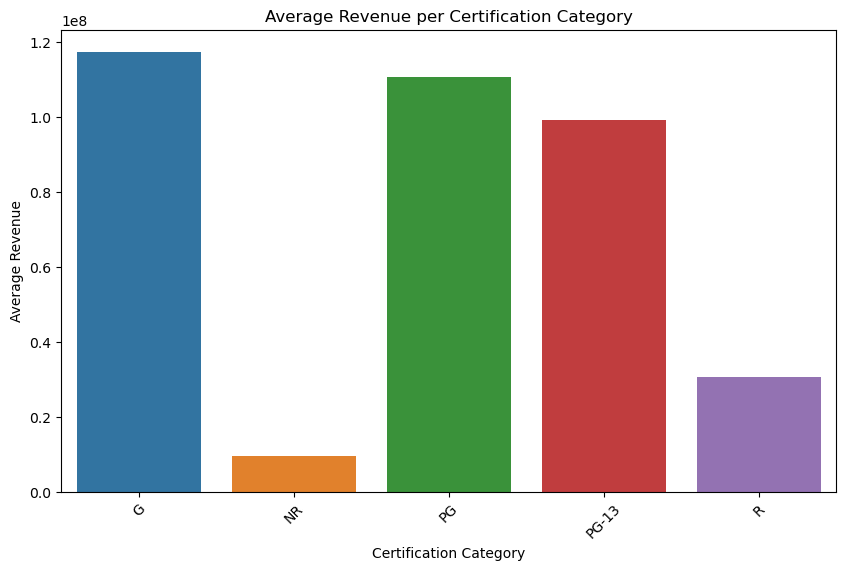

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rev_c.index, y=avg_rev_c.values)
plt.title("Average Revenue per Certification Category")
plt.xlabel("Certification Category")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()

# 4 Average Budget per Certification Category

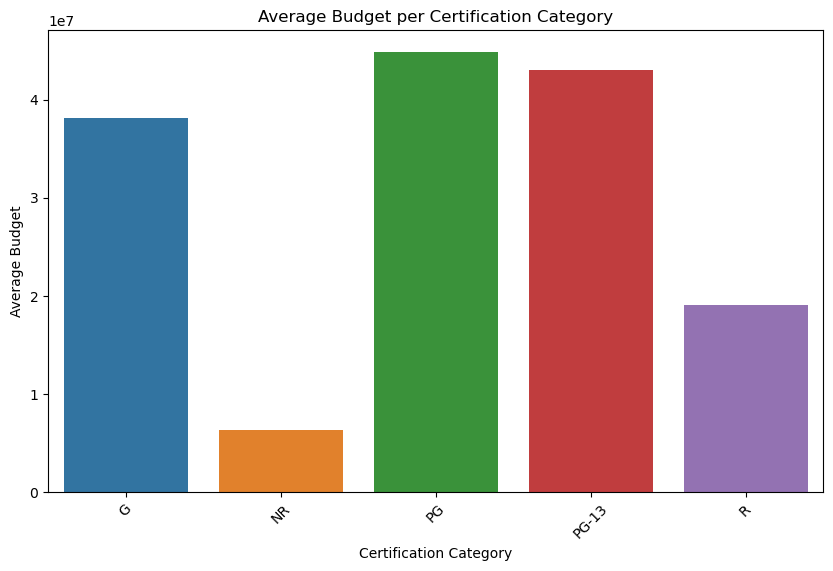

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_budget_c.index, y=avg_budget_c.values)
plt.title("Average Budget per Certification Category")
plt.xlabel("Certification Category")
plt.ylabel("Average Budget")
plt.xticks(rotation=45)
plt.show()